In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

Cargar el dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Obtenemos conjuntos de entrenamiento y de prueba

In [3]:
X= iris.drop('species', axis=1)
y = iris['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

#### Obtenemos los conjuntos de datos para setosa usando la estrategia one vs all

In [4]:
X_train2=X_train.copy()
X_train2['species'] = y_train
X_train2.loc[X_train2['species']!='Iris-setosa','species'] = 'non-setosa'
setosa=X_train2
setosa['species'].value_counts()
setosa_x = setosa.drop('species', axis=1)
setosa_y = setosa['species']

set

set

#### Obtenemos los vectores

In [5]:
vectores_setosa=setosa[setosa['species']=='Iris-setosa']
vectores_No_setosa=setosa[setosa['species']=='non-setosa']

vectores_setosa=vectores_setosa.drop('species', axis=1)
vectores_No_setosa=vectores_No_setosa.drop('species', axis=1)

vector_setosa=np.mean(vectores_setosa, axis=0).values
vector_No_setosa=np.mean(vectores_No_setosa, axis=0).values



In [6]:
print(vector_setosa)
print(vector_No_setosa)

vector_c_setosa=(vector_setosa+vector_No_setosa)/2

norm_vector_c_seto=np.linalg.norm(vector_c_setosa)
N_seto = setosa[setosa['species']=='Iris-setosa'].shape[0]
print(vector_c_setosa)
print(norm_vector_c_seto)
print(N_seto)


[5.02051282 3.4025641  1.46153846 0.23846154]
[6.29506173 2.88518519 4.94938272 1.70864198]
[5.65778727 3.14387464 3.20546059 0.97355176]
7.288160620418297
39


#### Obtenemos los conjuntos de datos para virginica usando la estrategia one vs all

In [7]:
X_train3=X_train.copy()
X_train3['species'] = y_train
X_train3.loc[X_train3['species']!='Iris-virginica','species'] = 'non-virginica'
virginica=X_train3
virginica['species'].value_counts()
virginica_x = virginica.drop('species', axis=1)
virginica_y = virginica['species']

#### Obtenemos los vectores

In [8]:
vectores_virginica=virginica[virginica['species']=='Iris-virginica']
vectores_No_virginica=virginica[virginica['species']=='non-virginica']

vectores_virginica=vectores_virginica.drop('species', axis=1)
vectores_No_virginica=vectores_No_virginica.drop('species', axis=1)

vector_virginica=np.mean(vectores_virginica, axis=0).values
vector_No_virginica=np.mean(vectores_No_virginica, axis=0).values


In [9]:
print(vector_virginica)
print(vector_No_virginica)

vector_c_virginica=(vector_virginica+vector_No_virginica)/2

norm_vector_c_virgi=np.linalg.norm(vector_c_virginica)
N_virgi = virginica[virginica['species']=='Iris-virginica'].shape[0]

print(vector_c_virginica)
print(norm_vector_c_virgi)
print(N_virgi)

[6.63863636 2.98863636 5.56590909 2.03181818]
[5.44210526 3.09078947 2.80263158 0.76710526]
[6.04037081 3.03971292 4.18427033 1.39946172]
8.074190085679165
44


#### Obtenemos los conjuntos de datos para versicolor usando la estrategia one vs all

In [10]:
X_train4=X_train.copy()
X_train4['species'] = y_train
X_train4.loc[X_train4['species']!='Iris-versicolor','species'] = 'non-versicolor'
versicolor=X_train4
versicolor['species'].value_counts()
versicolor_x = versicolor.drop('species', axis=1)
versicolor_y = versicolor['species']

#### Obtenemos los vectores

In [11]:
vectores_versicolor=versicolor[versicolor['species']=='Iris-versicolor']
vectores_No_versicolor=versicolor[versicolor['species']=='non-versicolor']

vectores_versicolor=vectores_versicolor.drop('species', axis=1)
vectores_No_versicolor=vectores_No_versicolor.drop('species', axis=1)

vector_versicolor=np.mean(vectores_versicolor, axis=0).values
vector_No_versicolor=np.mean(vectores_No_versicolor, axis=0).values


In [12]:
print(vector_versicolor)
print(vector_No_versicolor)

vector_c_versicolor=(vector_versicolor+vector_No_versicolor)/2

norm_vector_c_versi=np.linalg.norm(vector_c_versicolor)

N_versi = versicolor[versicolor['species']=='Iris-versicolor'].shape[0]

print(vector_c_versicolor)
print(norm_vector_c_versi)
print(N_versi)

[5.88648649 2.76216216 4.21621622 1.32432432]
[5.87831325 3.18313253 3.6373494  1.18915663]
[5.88239987 2.97264735 3.92678281 1.25674048]
7.774206088552404
37


### Realizamos las pruebas

In [13]:
clas_seto=[]
clas_virgi=[]
clas_versi=[]

for index, row in X_test.iterrows():
    
    proy_setosa = np.dot(row.values, vector_c_setosa) / norm_vector_c_seto
    proy_virginica = np.dot(row.values, vector_c_virginica) / norm_vector_c_virgi
    proy_versicolor = np.dot(row.values, vector_c_versicolor) / norm_vector_c_versi

    if (proy_setosa < norm_vector_c_seto): clas_seto.append(1)
    else: clas_seto.append(0)

    if (proy_virginica > norm_vector_c_virgi): clas_virgi.append(1)
    else: clas_virgi.append(0)

    if (proy_versicolor > norm_vector_c_versi): clas_versi.append(1)
    else: clas_versi.append(0)




In [14]:
y_pred = []

for i in range(len(clas_seto)):
    p_seto = clas_seto[i] * (N_seto / setosa_x.shape[0]) 
    p_virgi = clas_virgi[i] * (N_virgi / virginica_x.shape[0]) 
    p_versi = clas_versi[i] * (N_versi / versicolor_x.shape[0])

    if p_seto == p_virgi == p_versi:
        y_pred.append("indefinido")
    else:
        if p_seto > p_virgi and p_seto > p_versi:
            y_pred.append("Iris-setosa")
        elif p_virgi > p_seto and p_virgi > p_versi:
            y_pred.append("Iris-virginica")
        elif p_versi > p_seto and p_versi > p_virgi:
            y_pred.append("Iris-versicolor")
        else:
            y_pred.append("indefinido")


In [15]:
y_pred

['Iris-virginica',
 'indefinido',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'indefinido',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa']

In [16]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       0.92      1.00      0.96        11
Iris-versicolor       1.00      0.15      0.27        13
 Iris-virginica       0.43      1.00      0.60         6
     indefinido       0.00      0.00      0.00         0

       accuracy                           0.63        30
      macro avg       0.59      0.54      0.46        30
   weighted avg       0.86      0.63      0.59        30



/Users/sebastianloeza/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianloeza/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianloeza/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


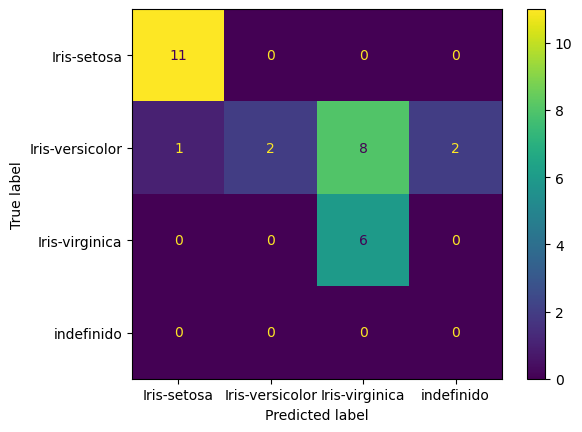

In [17]:
cm = confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica', 'indefinido'])
disp.plot()
plt.show()